# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Pandas: Carga y manipulación básica de datos

_Hasta ahora hemos visto varios grupos de estructuras para almacenamiento de datos. Aquellas que nos ofrece Python; integer, real, complex, boolen, list, tuple, dictionary... Los arrays que nos ofrece el paquete `NumPy`, y las matrices dispersas que nos proporciona el paquete `sparse` de `SciPy`._

_En este notebook, vamos a presentar y empezar a trabajar con el paquete `pandas`. En concreto, nos basaremos en algunos problemas para ver las características de sus estructuras de datos, y para aprender a cargar datos y empezar a manipularnos._

---

## ¿Qué es pandas?

`pandas` es una libreria que nos proporciona estructuras de datos y herramientas para realizar análisis de grandes volúmenes de datos de manera rápida.

Se articula sobre la librería `NumPy`, y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales, que requieren seguir un proceso de carga, limpieza, filtrado y reducción, y su posterior análisis.

Es de gran utilidad en la industria del Big Data, pues un grandísmo porcentaje del tiempo de trabajo de un Data Scientist, está asociado a la limpieza y preparación de los datos (ver [artículo](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#a5231076f637)), y pandas nos ayuda mucho en esta tarea.  

De manera estándar y por convenio, pandas se importa de la siguiente forma:

In [1]:
import pandas as pd

## Cargando los datos

Trabajaremos sobre un fichero de datos metereológicos de AEMET obtenido de su portal de datos abiertos a través de la API (ver notebook adjunto). https://opendata.aemet.es/centrodedescargas/inicio

In [2]:
# preserve
from IPython.display import HTML
HTML('<iframe src="https://opendata.aemet.es/centrodedescargas/inicio" width="700" height="400"></iframe>')

Vemos que pinta tiene el fichero:

In [3]:
# en Linux
!head ../data/alicante_city_climate_AEMET.csv

created on: Tue Feb 20 00:46:56 2018

dir	fecha	indicativo	nombre	prec	presMax	presMin	provincia	racha	sol	tmax	tmed	tmin	velmedia
14.0	2015-01-01	8025	ALICANTE/ALACANT	0.0	1027.2	1019.8	ALICANTE	4.7	8.6	16.0	9.6	3.2	1.4
19.0	2015-01-02	8025	ALICANTE/ALACANT	0.0	1028.8	1025.3	ALICANTE	4.2	8.8	18.1	10.0	2.0	1.1
99.0	2015-01-03	8025	ALICANTE/ALACANT	0.0	1027.8	1022.5	ALICANTE	7.2	8.6	19.5	11.3	3.1	2.2
6.0	2015-01-04	8025	ALICANTE/ALACANT	0.0	1022.5	1020.4	ALICANTE	6.1	8.8	20.3	13.4	6.5	1.7
99.0	2015-01-05	8025	ALICANTE/ALACANT	0.0	1021.5	1017.0	ALICANTE	4.2	8.9	16.9	10.8	4.8	1.1
7.0	2015-01-06	8025	ALICANTE/ALACANT	0.0	1018.1	1014.5	ALICANTE	5.0	8.9	15.6	9.6	3.5	1.1
12.0	2015-01-07	8025	ALICANTE/ALACANT	0.0	1023.8	1018.1	ALICANTE	4.7	4.6	17.2	11.1	5.0	0.8


In [4]:
# en Windows
# !more ..\data\alicante_city_climate_AEMET.csv

Vemos que los datos no están en formato CSV, aunque sí que tienen algo de estructura.

¿Qué sucede si intentamos cargarlos con pandas?

In [5]:
pd.read_csv("../data/alicante_city_climate_AEMET.csv").head(5)

,created on: Tue Feb 20 00:46:56 2018
0,dir\tfecha\tindicativo\tnombre\tprec\tpresMax\...
1,14.0\t2015-01-01\t8025\tALICANTE/ALACANT\t0.0\...
2,19.0\t2015-01-02\t8025\tALICANTE/ALACANT\t0.0\...
3,99.0\t2015-01-03\t8025\tALICANTE/ALACANT\t0.0\...
4,6.0\t2015-01-04\t8025\tALICANTE/ALACANT\t0.0\t...


Tenemos que hacer los siguientes cambios:
* Separar los campos por tabuladores
* Saltar las primeras lineas.
* Dar nombre a las nuevas columnas.
* Descartar columnas que no nos interesan
* Convertir las fechas al formato correcto.

In [6]:
data = pd.read_csv(
    "../data/alicante_city_climate_AEMET.csv",
    skiprows=3,
    delimiter='\t',
    usecols=[0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13],
    names=['DIR', 'DATE', 'NAME', 'PRECIP', 'PMAX', 'PMIN', 'MAG_MAX', 'TMAX', 'TMED', 'TMIN', 'MAG_MED'],
    parse_dates=['DATE'],
    index_col=['DATE']
    )

data.head()

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,ALICANTE/ALACANT,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7
2015-01-05,99.0,ALICANTE/ALACANT,0.0,1021.5,1017.0,4.2,16.9,10.8,4.8,1.1


<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

## Explorando los datos

In [7]:
# recuperar los tipos de datos de cada columna
data.dtypes

DIR        float64
NAME        object
PRECIP     float64
PMAX       float64
PMIN       float64
MAG_MAX    float64
TMAX       float64
TMED       float64
TMIN       float64
MAG_MED    float64
dtype: object

In [8]:
data.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1096, freq=None)

In [9]:
# Muestro solo las primers 4 líneas
data.head(4)

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,ALICANTE/ALACANT,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7


In [10]:
# Muestro sólo las últimas 6 líneas
data.tail(6)

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2017-12-26,31.0,ALICANTE/ALACANT,0.0,1012.7,1003.2,9.7,19.4,13.3,7.2,2.8
2017-12-27,30.0,ALICANTE/ALACANT,0.0,1004.0,994.6,18.6,17.5,14.0,10.5,4.7
2017-12-28,31.0,ALICANTE/ALACANT,0.0,1005.9,999.6,12.5,22.6,16.6,10.7,2.5
2017-12-29,27.0,ALICANTE/ALACANT,0.0,1016.3,1005.8,14.2,21.5,18.0,14.4,2.8
2017-12-30,28.0,ALICANTE/ALACANT,0.0,1016.9,1013.5,9.2,24.0,17.0,10.1,2.8
2017-12-31,28.0,ALICANTE/ALACANT,0.0,1018.1,1010.1,16.4,18.7,13.3,7.9,2.5


In [11]:
# Muestro sólo determinadas líneas
data[1:4:2]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7


In [12]:
# Ordeno de índice más antiguo a más moderno
data.sort_index(inplace=True)
data.head(5)

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,ALICANTE/ALACANT,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,ALICANTE/ALACANT,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7
2015-01-05,99.0,ALICANTE/ALACANT,0.0,1021.5,1017.0,4.2,16.9,10.8,4.8,1.1


In [13]:
# Ordeno de mayor a menor la temperatura media
data.sort_values('TMED', inplace=True, ascending=False)
data.head()

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-08-13,31.0,ALICANTE/ALACANT,0.0,1006.1,1002.9,11.4,38.2,31.4,24.6,2.8
2016-07-31,19.0,ALICANTE/ALACANT,0.0,1006.1,1002.7,7.2,38.8,30.9,23.0,2.2
2017-08-02,NaN,ALICANTE/ALACANT,0.0,1007.0,1004.5,NaN,34.4,30.8,27.2,NaN
2015-07-27,11.0,ALICANTE/ALACANT,0.0,1003.2,1001.2,6.7,36.8,30.4,23.9,2.5
2017-08-03,NaN,ALICANTE/ALACANT,0.0,1006.8,1004.0,NaN,35.4,30.0,24.6,NaN


In [14]:
# Información general del dataset. 
# Cuidado, para cada columna son las filas con elementos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2015-08-13 to 2017-07-02
Data columns (total 10 columns):
DIR        1073 non-null float64
NAME       1096 non-null object
PRECIP     1061 non-null float64
PMAX       1094 non-null float64
PMIN       1094 non-null float64
MAG_MAX    1073 non-null float64
TMAX       1094 non-null float64
TMED       1094 non-null float64
TMIN       1094 non-null float64
MAG_MED    1075 non-null float64
dtypes: float64(9), object(1)
memory usage: 94.2+ KB


In [15]:
# Numero de filas y columnas en el dataset
data.shape

(1096, 10)

In [16]:
# contamos cuantos elementos tenemos sin valor
data.isnull().sum()

DIR        23
NAME        0
PRECIP     35
PMAX        2
PMIN        2
MAG_MAX    23
TMAX        2
TMED        2
TMIN        2
MAG_MED    21
dtype: int64

In [17]:
# contamos cuantos elementos tenemos con valor
data.count(axis=0)

DIR        1073
NAME       1096
PRECIP     1061
PMAX       1094
PMIN       1094
MAG_MAX    1073
TMAX       1094
TMED       1094
TMIN       1094
MAG_MED    1075
dtype: int64

### Descripción estadística

Se pueden pedir los datos estadísticos asociados al dataframe.

In [18]:
# Descripción estadística
data.describe()

,DIR,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
count,1073.000000,1061.000000,1094.000000,1094.000000,1073.000000,1094.000000,1094.000000,1094.000000,1075.000000
mean,20.983225,0.801885,1011.154479,1006.691865,8.047064,24.039488,19.031718,14.022212,2.220279
std,21.613931,5.249819,6.074767,6.570117,2.833214,5.670956,5.660407,5.952143,0.811738
min,1.000000,0.000000,988.200000,980.100000,2.800000,8.500000,4.600000,0.300000,0.600000
25%,8.000000,0.000000,1007.300000,1002.900000,6.100000,19.400000,14.025000,9.100000,1.700000
50%,14.000000,0.000000,1010.600000,1006.500000,7.200000,23.700000,18.900000,13.800000,2.200000
75%,24.000000,0.000000,1014.300000,1010.300000,9.700000,28.800000,23.800000,18.775000,2.500000
max,99.000000,112.200000,1034.000000,1030.000000,19.700000,38.800000,31.400000,27.200000,6.100000


Por defecto, los elementos con NA no se tienen en cuenta a la hora de calcular los valores. Se puede comprobar viendo como cambian los datos cuando se sustitiyen con ceros.

In [19]:
# Cambiar NA por ceros y volver a ver la descripción estadística
# recuerda que esto no cambia data en realidad, porque no lo hemos guardado
data.fillna(0).describe()

,DIR,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,20.542883,0.776277,1009.309307,1004.854836,7.878193,23.995620,18.996989,13.996624,2.177737
std,21.596380,5.167162,43.599150,43.482420,3.031519,5.758002,5.713322,5.976769,0.859657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,1007.275000,1002.900000,6.100000,19.400000,14.000000,9.000000,1.700000
50%,14.000000,0.000000,1010.600000,1006.500000,7.200000,23.700000,18.850000,13.800000,1.900000
75%,23.000000,0.000000,1014.300000,1010.300000,9.400000,28.800000,23.800000,18.725000,2.500000
max,99.000000,112.200000,1034.000000,1030.000000,19.700000,38.800000,31.400000,27.200000,6.100000


Otra forma de acceder a los datos estadísticos, es pedirlos de forma directa.

In [20]:
data.mean()

DIR          20.983225
PRECIP        0.801885
PMAX       1011.154479
PMIN       1006.691865
MAG_MAX       8.047064
TMAX         24.039488
TMED         19.031718
TMIN         14.022212
MAG_MED       2.220279
dtype: float64

In [21]:
data.quantile(0.25)

DIR           8.000
PRECIP        0.000
PMAX       1007.300
PMIN       1002.900
MAG_MAX       6.100
TMAX         19.400
TMED         14.025
TMIN          9.100
MAG_MED       1.700
Name: 0.25, dtype: float64

## Accediendo a los datos.

Tenemos dos funciones principales para acceder a los datos, que son `.loc` que permite acceder por etiquetas, y `.iloc`que permite acceder por índices. 

##### columnas

Hay varias formas de acceder a las columnas: por nombre o por atributo (si no contienen espacios ni caracteres especiales).


In [22]:
# accediendo a una columna por el nombre (label) y obteniendo una serie
data['TMAX'].head()

DATE
2015-08-13    38.2
2016-07-31    38.8
2017-08-02    34.4
2015-07-27    36.8
2017-08-03    35.4
Name: TMAX, dtype: float64

In [23]:
# accediendo a una columna por el nombre (label) y obteniendo un dataframe.
data[['TMAX']].head()

,TMAX
DATE,
2015-08-13,38.2
2016-07-31,38.8
2017-08-02,34.4
2015-07-27,36.8
2017-08-03,35.4


In [24]:
# accediendo a varias columnas por el nombre (lable)
data[['TMAX', 'TMED']].head()

,TMAX,TMED
DATE,,
2015-08-13,38.2,31.4
2016-07-31,38.8,30.9
2017-08-02,34.4,30.8
2015-07-27,36.8,30.4
2017-08-03,35.4,30.0


In [25]:
# accediendo a una columna por el atributo
data.TMED.head()

DATE
2015-08-13    31.4
2016-07-31    30.9
2017-08-02    30.8
2015-07-27    30.4
2017-08-03    30.0
Name: TMED, dtype: float64

##### filas

Para acceder a las filas tenemos dos métodos: `.loc` (basado en etiquetas), `.iloc` (basado en posiciones enteras).

In [26]:
# accediendo a una fila por etiqueta y obteniendo una serie
data.loc[pd.to_datetime("2016-09-02")]

DIR                      16
NAME       ALICANTE/ALACANT
PRECIP                    0
PMAX                 1012.4
PMIN                   1010
MAG_MAX                 6.1
TMAX                   29.6
TMED                     25
TMIN                   20.5
MAG_MED                 1.9
Name: 2016-09-02 00:00:00, dtype: object

In [27]:
# accediendo a una fila por etiqueta y obteniendo un dataframe
data.loc[[pd.to_datetime("2016-09-02")]]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2016-09-02,16.0,ALICANTE/ALACANT,0.0,1012.4,1010.0,6.1,29.6,25.0,20.5,1.9


In [28]:
# accediendo a varias filas por etiqueta
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")]]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2016-12-01,6.0,ALICANTE/ALACANT,0.2,1019.0,1014.1,8.6,16.5,13.9,11.3,1.9
2016-12-03,12.0,ALICANTE/ALACANT,0.2,1006.3,1003.9,3.6,18.5,13.0,7.5,1.1


In [29]:
# accediendo a una fila por índice y obteniendo una serie
data.iloc[1]

DIR                      19
NAME       ALICANTE/ALACANT
PRECIP                    0
PMAX                 1006.1
PMIN                 1002.7
MAG_MAX                 7.2
TMAX                   38.8
TMED                   30.9
TMIN                     23
MAG_MED                 2.2
Name: 2016-07-31 00:00:00, dtype: object

In [30]:
# accediendo a una fila por índice y obteniendo un dataframe
data.iloc[[1]]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2016-07-31,19.0,ALICANTE/ALACANT,0.0,1006.1,1002.7,7.2,38.8,30.9,23.0,2.2


In [31]:
# accediendo a varias filas por indice
data.iloc[1:10:3]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2016-07-31,19.0,ALICANTE/ALACANT,0.0,1006.1,1002.7,7.2,38.8,30.9,23.0,2.2
2017-08-03,NaN,ALICANTE/ALACANT,0.0,1006.8,1004.0,NaN,35.4,30.0,24.6,NaN
2015-07-07,9.0,ALICANTE/ALACANT,0.0,1008.2,1004.3,5.6,37.4,29.8,22.1,1.7


##### filas y columnas 

In [32]:
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")], ["TMAX", "TMIN"]]

,TMAX,TMIN
DATE,,
2016-12-01,16.5,11.3
2016-12-03,18.5,7.5


In [33]:
data.iloc[[1,10,3], [2, 3]]

,PRECIP,PMAX
DATE,,
2016-07-31,0.0,1006.1
2015-07-25,0.0,1006.7
2015-07-27,0.0,1003.2


## Filtrado de datos

In [34]:
# busco duplicados en las fechas
data[data.index.duplicated()]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,


In [35]:
# TMax > 37
data[data['TMAX']> 37]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-08-13,31.0,ALICANTE/ALACANT,0.0,1006.1,1002.9,11.4,38.2,31.4,24.6,2.8
2016-07-31,19.0,ALICANTE/ALACANT,0.0,1006.1,1002.7,7.2,38.8,30.9,23.0,2.2
2015-07-07,9.0,ALICANTE/ALACANT,0.0,1008.2,1004.3,5.6,37.4,29.8,22.1,1.7
2016-09-05,6.0,ALICANTE/ALACANT,0.0,1009.8,1007.6,5.8,37.2,29.8,22.5,1.7


In [36]:
# 0<TMin< 2
data[(0<data['TMIN']) & (data['TMIN']< 2)]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2017-12-18,30.0,ALICANTE/ALACANT,0.4,1021.8,1011.5,10.8,16.0,8.8,1.5,1.7
2017-12-05,22.0,ALICANTE/ALACANT,0.0,1027.2,1024.8,4.7,16.7,8.8,0.9,1.1
2017-12-04,11.0,ALICANTE/ALACANT,0.0,1026.3,1020.1,4.7,15.1,8.1,1.1,1.4
2015-02-08,18.0,ALICANTE/ALACANT,0.0,1013.3,1009.1,7.8,14.4,8.0,1.6,1.9
2016-01-17,19.0,ALICANTE/ALACANT,0.0,1019.7,1011.1,5.0,15.0,8.0,1.0,1.4
2015-02-09,7.0,ALICANTE/ALACANT,0.4,1016.3,1009.9,11.4,13.2,7.4,1.7,3.3
2015-01-18,19.0,ALICANTE/ALACANT,7.0,1012.5,998.5,5.3,14.6,7.4,0.3,1.4
2015-02-07,16.0,ALICANTE/ALACANT,0.0,1012.7,1004.8,5.6,11.6,6.5,1.4,1.1
2017-01-18,7.0,ALICANTE/ALACANT,16.4,1010.1,1007.9,8.9,8.5,4.6,0.6,1.9


In [37]:
# Busqueda de valores nulos
data.loc[data.PRECIP.isnull()]

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-07-31,9.0,ALICANTE/ALACANT,NaN,1001.6,997.5,9.2,29.8,27.8,25.7,2.8
2017-08-07,23.0,ALICANTE/ALACANT,NaN,1006.7,1000.5,14.2,31.8,27.8,23.9,2.5
2017-07-06,8.0,ALICANTE/ALACANT,NaN,1008.5,1004.0,8.9,31.7,27.2,22.6,2.8
2015-08-15,6.0,ALICANTE/ALACANT,NaN,1005.3,1002.0,10.8,29.7,25.9,22.1,3.3
2017-09-02,16.0,ALICANTE/ALACANT,NaN,1012.0,1009.2,6.4,28.4,24.4,20.5,1.9
2016-05-28,30.0,ALICANTE/ALACANT,NaN,1006.0,1000.6,18.1,30.6,24.0,17.4,1.9
2017-09-01,6.0,ALICANTE/ALACANT,NaN,1009.5,1006.4,10.8,28.1,24.0,20.0,3.1
2016-09-29,7.0,ALICANTE/ALACANT,NaN,1017.4,1011.5,9.4,26.4,22.8,19.2,2.8
2017-05-29,6.0,ALICANTE/ALACANT,NaN,1007.5,1004.4,6.9,25.7,21.6,17.6,2.2


## Representaciones de datos

In [38]:
# Importamos  matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#### Líneas

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Temperaturas')

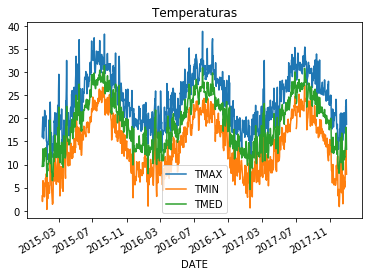

In [39]:
# Pintar la temperatura máx, min, med
data.plot(y=["TMAX", "TMIN", "TMED"])
plt.title('Temperaturas')

Pintar datos para una fecha.

#### barras

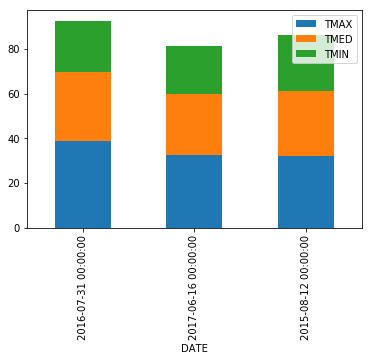

In [40]:
data.iloc[[1,100,20], [6,7,8]].plot(kind='bar', stacked=True)

#### cajas

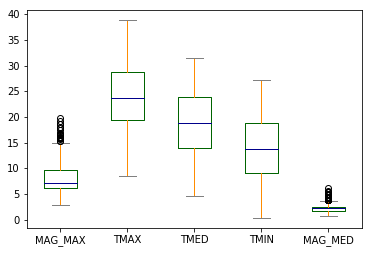

In [41]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data[['MAG_MAX', 'TMAX', 'TMED', 'TMIN', 'MAG_MED']].plot.box(color=color)

### Visualizaciones especiales

#### scatter

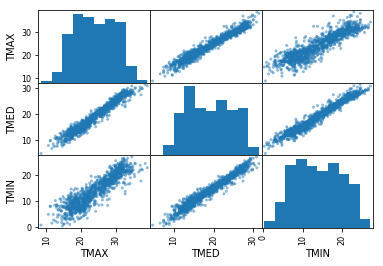

In [42]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMIN"])

---

Hemos aprendido:
* Como leer un CSV con distintos formatos utilizando la librería pandas.
* Como extraer información de la librería los datos cargados.
* Como acceder a los datos cargados.
* Como representar datos con pandas.

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [43]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())